# Train and test the model

In [1]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import load_model
from keras import optimizers
from keras.callbacks import EarlyStopping
from tqdm import tqdm

# functions from other notebooks
import sys
sys.path.insert(0, '../functions')
from ipynb.fs.full.models import classifier
# from ipynb.fs.full.generate_data import convert, visualize

Using TensorFlow backend.


# Data

In [2]:
# load data
f_path = 'c_data_2A.h5'
X = pd.read_hdf(f_path, 'X')
y = pd.read_hdf(f_path, 'y')

In [3]:
# Data preprocessing

# uniformly scale data
X_scaled=X*(10**22)

# Train test split with sklearn
X_train,X_test,y_train,y_test = train_test_split(X_scaled.values,y.values,test_size=0.1,random_state=13)

# save test set
f_path = 'c_testdata_2A.h5'
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)
X_test_df.to_hdf(f_path, key='X', mode='w')
y_test_df.to_hdf(f_path, key='y')

C:\Users\Ruining\.conda\envs\machine_learning\lib\site-packages\pandas\core\generic.py:2531: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->floating,key->block0_values] [items->[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167

In [4]:
# Reshape data
Xtrain = []
for i in np.arange(len(X_train)):
    h = X_train[i].reshape(4096,1)
    Xtrain.append(h)
X_train = np.asarray(Xtrain)

Xtest = []
for i in np.arange(len(X_test)):
    h = X_test[i].reshape(4096,1)
    Xtest.append(h)
X_test = np.asarray(Xtest)

# one hot code y
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model

In [9]:
# Check model performance accuracy before

model = load_model("classify1B.h5")

# Pre_train score record
pre_score = model.evaluate(X_test, y_test, verbose=1)

1773/1773 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 691us/step


In [10]:
# fit network

epoch = 150
batch_size = 5

earlystopping_callback = EarlyStopping(monitor='val_acc',verbose=1,min_delta=0.5,patience=20,baseline=None)

history = model.fit(X_train, y_train, validation_split = 0.20, batch_size=batch_size, epochs=epoch, verbose=1,
                   callbacks=[earlystopping_callback])

Train on 12759 samples, validate on 3190 samples
Epoch 1/150
 6730/12759 [==============>...............] - ETA: 8:55 - loss: 3.2236 - acc: 0.800 - ETA: 1:26 - loss: 0.8062 - acc: 0.950 - ETA: 57s - loss: 0.8598 - acc: 0.946 - ETA: 46s - loss: 0.7684 - acc: 0.94 - ETA: 40s - loss: 0.8715 - acc: 0.93 - ETA: 36s - loss: 0.7891 - acc: 0.93 - ETA: 33s - loss: 0.8857 - acc: 0.93 - ETA: 32s - loss: 0.8396 - acc: 0.93 - ETA: 30s - loss: 0.9232 - acc: 0.92 - ETA: 29s - loss: 1.0139 - acc: 0.90 - ETA: 28s - loss: 1.0330 - acc: 0.90 - ETA: 27s - loss: 0.9490 - acc: 0.91 - ETA: 27s - loss: 0.8786 - acc: 0.92 - ETA: 26s - loss: 0.8823 - acc: 0.92 - ETA: 26s - loss: 0.8201 - acc: 0.92 - ETA: 25s - loss: 0.7646 - acc: 0.93 - ETA: 25s - loss: 0.7251 - acc: 0.93 - ETA: 24s - loss: 0.7389 - acc: 0.93 - ETA: 24s - loss: 0.7491 - acc: 0.93 - ETA: 24s - loss: 0.7220 - acc: 0.93 - ETA: 24s - loss: 0.6876 - acc: 0.93 - ETA: 24s - loss: 0.6591 - acc: 0.93 - ETA: 24s - loss: 0.6372 - acc: 0.93 - ETA: 23s - lo

 6695/12759 [==============>...............] - ETA: 1:01 - loss: 4.6726e-04 - acc: 1.000 - ETA: 26s - loss: 2.9731e-04 - acc: 1.000 - ETA: 25s - loss: 2.2266e-04 - acc: 1.00 - ETA: 24s - loss: 3.9622e-04 - acc: 1.00 - ETA: 23s - loss: 3.7121e-04 - acc: 1.00 - ETA: 23s - loss: 4.2427e-04 - acc: 1.00 - ETA: 23s - loss: 7.6554e-04 - acc: 1.00 - ETA: 23s - loss: 7.1075e-04 - acc: 1.00 - ETA: 23s - loss: 0.0121 - acc: 0.9920   - ETA: 22s - loss: 0.0109 - acc: 0.99 - ETA: 22s - loss: 0.0098 - acc: 0.99 - ETA: 23s - loss: 0.0091 - acc: 0.99 - ETA: 22s - loss: 0.0086 - acc: 0.99 - ETA: 22s - loss: 0.0080 - acc: 0.99 - ETA: 22s - loss: 0.0106 - acc: 0.99 - ETA: 22s - loss: 0.0099 - acc: 0.99 - ETA: 22s - loss: 0.0093 - acc: 0.99 - ETA: 22s - loss: 0.0087 - acc: 0.99 - ETA: 22s - loss: 0.0083 - acc: 0.99 - ETA: 22s - loss: 0.0079 - acc: 0.99 - ETA: 22s - loss: 0.0075 - acc: 0.99 - ETA: 22s - loss: 0.0071 - acc: 0.99 - ETA: 22s - loss: 0.0068 - acc: 0.99 - ETA: 22s - loss: 0.0065 - acc: 0.99 - ET

12759/12759 [==============================] - ETA: 10s - loss: 0.0120 - acc: 0.99 - ETA: 10s - loss: 0.0120 - acc: 0.99 - ETA: 10s - loss: 0.0119 - acc: 0.99 - ETA: 10s - loss: 0.0119 - acc: 0.99 - ETA: 10s - loss: 0.0118 - acc: 0.99 - ETA: 10s - loss: 0.0118 - acc: 0.99 - ETA: 10s - loss: 0.0122 - acc: 0.99 - ETA: 10s - loss: 0.0122 - acc: 0.99 - ETA: 10s - loss: 0.0121 - acc: 0.99 - ETA: 10s - loss: 0.0121 - acc: 0.99 - ETA: 10s - loss: 0.0120 - acc: 0.99 - ETA: 10s - loss: 0.0126 - acc: 0.99 - ETA: 9s - loss: 0.0127 - acc: 0.9976 - ETA: 9s - loss: 0.0127 - acc: 0.997 - ETA: 9s - loss: 0.0126 - acc: 0.997 - ETA: 9s - loss: 0.0126 - acc: 0.997 - ETA: 9s - loss: 0.0125 - acc: 0.997 - ETA: 9s - loss: 0.0125 - acc: 0.997 - ETA: 9s - loss: 0.0124 - acc: 0.997 - ETA: 9s - loss: 0.0125 - acc: 0.997 - ETA: 9s - loss: 0.0125 - acc: 0.997 - ETA: 9s - loss: 0.0124 - acc: 0.997 - ETA: 9s - loss: 0.0125 - acc: 0.997 - ETA: 9s - loss: 0.0124 - acc: 0.997 - ETA: 9s - loss: 0.0124 - acc: 0.997 - ET

 6360/12759 [=============>................] - ETA: 20s - loss: 6.6957e-04 - acc: 1.00 - ETA: 21s - loss: 0.0018 - acc: 1.0000   - ETA: 21s - loss: 0.0010 - acc: 1.00 - ETA: 21s - loss: 7.9652e-04 - acc: 1.00 - ETA: 22s - loss: 6.8607e-04 - acc: 1.00 - ETA: 22s - loss: 6.6721e-04 - acc: 1.00 - ETA: 22s - loss: 6.1451e-04 - acc: 1.00 - ETA: 21s - loss: 5.9499e-04 - acc: 1.00 - ETA: 22s - loss: 5.9217e-04 - acc: 1.00 - ETA: 21s - loss: 6.0321e-04 - acc: 1.00 - ETA: 22s - loss: 6.0284e-04 - acc: 1.00 - ETA: 21s - loss: 5.7606e-04 - acc: 1.00 - ETA: 21s - loss: 5.5223e-04 - acc: 1.00 - ETA: 21s - loss: 8.1333e-04 - acc: 1.00 - ETA: 21s - loss: 8.0668e-04 - acc: 1.00 - ETA: 21s - loss: 7.7139e-04 - acc: 1.00 - ETA: 21s - loss: 7.3917e-04 - acc: 1.00 - ETA: 21s - loss: 7.0143e-04 - acc: 1.00 - ETA: 21s - loss: 6.7174e-04 - acc: 1.00 - ETA: 21s - loss: 0.0287 - acc: 0.9983   - ETA: 21s - loss: 0.0273 - acc: 0.99 - ETA: 21s - loss: 0.0260 - acc: 0.99 - ETA: 21s - loss: 0.0256 - acc: 0.99 - ETA

12759/12759 [==============================] - ETA: 11s - loss: 0.0085 - acc: 0.99 - ETA: 11s - loss: 0.0084 - acc: 0.99 - ETA: 11s - loss: 0.0084 - acc: 0.99 - ETA: 11s - loss: 0.0084 - acc: 0.99 - ETA: 11s - loss: 0.0083 - acc: 0.99 - ETA: 11s - loss: 0.0084 - acc: 0.99 - ETA: 11s - loss: 0.0084 - acc: 0.99 - ETA: 10s - loss: 0.0084 - acc: 0.99 - ETA: 10s - loss: 0.0083 - acc: 0.99 - ETA: 10s - loss: 0.0083 - acc: 0.99 - ETA: 10s - loss: 0.0083 - acc: 0.99 - ETA: 10s - loss: 0.0082 - acc: 0.99 - ETA: 10s - loss: 0.0082 - acc: 0.99 - ETA: 10s - loss: 0.0081 - acc: 0.99 - ETA: 10s - loss: 0.0081 - acc: 0.99 - ETA: 10s - loss: 0.0081 - acc: 0.99 - ETA: 10s - loss: 0.0080 - acc: 0.99 - ETA: 10s - loss: 0.0080 - acc: 0.99 - ETA: 10s - loss: 0.0080 - acc: 0.99 - ETA: 10s - loss: 0.0079 - acc: 0.99 - ETA: 10s - loss: 0.0079 - acc: 0.99 - ETA: 10s - loss: 0.0079 - acc: 0.99 - ETA: 10s - loss: 0.0078 - acc: 0.99 - ETA: 10s - loss: 0.0078 - acc: 0.99 - ETA: 10s - loss: 0.0078 - acc: 0.99 - ETA

Epoch 5/150
 6615/12759 [==============>...............] - ETA: 20s - loss: 4.2915e-07 - acc: 1.00 - ETA: 21s - loss: 6.9860e-06 - acc: 1.00 - ETA: 22s - loss: 4.1111e-06 - acc: 1.00 - ETA: 22s - loss: 3.2696e-06 - acc: 1.00 - ETA: 22s - loss: 8.9512e-06 - acc: 1.00 - ETA: 22s - loss: 2.0145e-05 - acc: 1.00 - ETA: 22s - loss: 0.0855 - acc: 0.9946   - ETA: 22s - loss: 0.1218 - acc: 0.99 - ETA: 21s - loss: 0.1069 - acc: 0.99 - ETA: 22s - loss: 0.0953 - acc: 0.99 - ETA: 21s - loss: 0.0859 - acc: 0.99 - ETA: 21s - loss: 0.0783 - acc: 0.99 - ETA: 21s - loss: 0.0719 - acc: 0.99 - ETA: 21s - loss: 0.0665 - acc: 0.99 - ETA: 21s - loss: 0.0618 - acc: 0.99 - ETA: 21s - loss: 0.0578 - acc: 0.99 - ETA: 21s - loss: 0.0542 - acc: 0.99 - ETA: 21s - loss: 0.0510 - acc: 0.99 - ETA: 21s - loss: 0.0483 - acc: 0.99 - ETA: 21s - loss: 0.0458 - acc: 0.99 - ETA: 21s - loss: 0.0465 - acc: 0.99 - ETA: 21s - loss: 0.0443 - acc: 0.99 - ETA: 21s - loss: 0.0423 - acc: 0.99 - ETA: 21s - loss: 0.0405 - acc: 0.99 - E

 6575/12759 [==============>...............] - ETA: 20s - loss: 9.3224e-06 - acc: 1.00 - ETA: 21s - loss: 4.3870e-06 - acc: 1.00 - ETA: 22s - loss: 3.9230e-06 - acc: 1.00 - ETA: 22s - loss: 1.5197e-05 - acc: 1.00 - ETA: 22s - loss: 1.2434e-05 - acc: 1.00 - ETA: 22s - loss: 1.0152e-05 - acc: 1.00 - ETA: 22s - loss: 9.0554e-06 - acc: 1.00 - ETA: 21s - loss: 8.0103e-06 - acc: 1.00 - ETA: 22s - loss: 7.4762e-06 - acc: 1.00 - ETA: 21s - loss: 6.9170e-06 - acc: 1.00 - ETA: 21s - loss: 7.2292e-06 - acc: 1.00 - ETA: 21s - loss: 6.8327e-06 - acc: 1.00 - ETA: 21s - loss: 6.5314e-06 - acc: 1.00 - ETA: 21s - loss: 6.5181e-06 - acc: 1.00 - ETA: 21s - loss: 8.7881e-06 - acc: 1.00 - ETA: 21s - loss: 3.9284e-05 - acc: 1.00 - ETA: 21s - loss: 3.7278e-05 - acc: 1.00 - ETA: 21s - loss: 3.8063e-05 - acc: 1.00 - ETA: 21s - loss: 3.6479e-05 - acc: 1.00 - ETA: 21s - loss: 3.4738e-05 - acc: 1.00 - ETA: 21s - loss: 3.9961e-05 - acc: 1.00 - ETA: 21s - loss: 3.9037e-05 - acc: 1.00 - ETA: 21s - loss: 3.7152e-05 -

12759/12759 [==============================] - ETA: 10s - loss: 0.0044 - acc: 0.99 - ETA: 10s - loss: 0.0044 - acc: 0.99 - ETA: 10s - loss: 0.0046 - acc: 0.99 - ETA: 10s - loss: 0.0050 - acc: 0.99 - ETA: 10s - loss: 0.0050 - acc: 0.99 - ETA: 10s - loss: 0.0050 - acc: 0.99 - ETA: 10s - loss: 0.0050 - acc: 0.99 - ETA: 10s - loss: 0.0050 - acc: 0.99 - ETA: 10s - loss: 0.0049 - acc: 0.99 - ETA: 10s - loss: 0.0049 - acc: 0.99 - ETA: 10s - loss: 0.0053 - acc: 0.99 - ETA: 10s - loss: 0.0053 - acc: 0.99 - ETA: 10s - loss: 0.0053 - acc: 0.99 - ETA: 10s - loss: 0.0052 - acc: 0.99 - ETA: 10s - loss: 0.0052 - acc: 0.99 - ETA: 9s - loss: 0.0052 - acc: 0.9989 - ETA: 9s - loss: 0.0052 - acc: 0.998 - ETA: 9s - loss: 0.0052 - acc: 0.998 - ETA: 9s - loss: 0.0051 - acc: 0.998 - ETA: 9s - loss: 0.0051 - acc: 0.998 - ETA: 9s - loss: 0.0051 - acc: 0.998 - ETA: 9s - loss: 0.0051 - acc: 0.998 - ETA: 9s - loss: 0.0073 - acc: 0.998 - ETA: 9s - loss: 0.0072 - acc: 0.998 - ETA: 9s - loss: 0.0072 - acc: 0.998 - ET

 6635/12759 [==============>...............] - ETA: 30s - loss: 4.5865e-05 - acc: 1.00 - ETA: 23s - loss: 1.6055e-05 - acc: 1.00 - ETA: 22s - loss: 3.8839e-05 - acc: 1.00 - ETA: 22s - loss: 3.6521e-05 - acc: 1.00 - ETA: 22s - loss: 3.6206e-05 - acc: 1.00 - ETA: 22s - loss: 2.9925e-05 - acc: 1.00 - ETA: 22s - loss: 2.5438e-05 - acc: 1.00 - ETA: 22s - loss: 2.5480e-05 - acc: 1.00 - ETA: 22s - loss: 2.7308e-05 - acc: 1.00 - ETA: 21s - loss: 4.8513e-05 - acc: 1.00 - ETA: 21s - loss: 4.4390e-05 - acc: 1.00 - ETA: 21s - loss: 4.1887e-05 - acc: 1.00 - ETA: 21s - loss: 3.8844e-05 - acc: 1.00 - ETA: 21s - loss: 3.5956e-05 - acc: 1.00 - ETA: 21s - loss: 0.0163 - acc: 0.9976   - ETA: 21s - loss: 0.0152 - acc: 0.99 - ETA: 21s - loss: 0.0144 - acc: 0.99 - ETA: 21s - loss: 0.0284 - acc: 0.99 - ETA: 21s - loss: 0.0268 - acc: 0.99 - ETA: 21s - loss: 0.0250 - acc: 0.99 - ETA: 21s - loss: 0.0238 - acc: 0.99 - ETA: 21s - loss: 0.0226 - acc: 0.99 - ETA: 21s - loss: 0.0216 - acc: 0.99 - ETA: 21s - loss: 0.

12759/12759 [==============================] - ETA: 10s - loss: 0.0025 - acc: 0.99 - ETA: 10s - loss: 0.0025 - acc: 0.99 - ETA: 10s - loss: 0.0024 - acc: 0.99 - ETA: 10s - loss: 0.0024 - acc: 0.99 - ETA: 10s - loss: 0.0024 - acc: 0.99 - ETA: 10s - loss: 0.0024 - acc: 0.99 - ETA: 10s - loss: 0.0024 - acc: 0.99 - ETA: 10s - loss: 0.0024 - acc: 0.99 - ETA: 10s - loss: 0.0024 - acc: 0.99 - ETA: 10s - loss: 0.0024 - acc: 0.99 - ETA: 10s - loss: 0.0024 - acc: 0.99 - ETA: 10s - loss: 0.0024 - acc: 0.99 - ETA: 10s - loss: 0.0023 - acc: 0.99 - ETA: 10s - loss: 0.0023 - acc: 0.99 - ETA: 9s - loss: 0.0023 - acc: 0.9997 - ETA: 9s - loss: 0.0023 - acc: 0.999 - ETA: 9s - loss: 0.0023 - acc: 0.999 - ETA: 9s - loss: 0.0023 - acc: 0.999 - ETA: 9s - loss: 0.0023 - acc: 0.999 - ETA: 9s - loss: 0.0023 - acc: 0.999 - ETA: 9s - loss: 0.0023 - acc: 0.999 - ETA: 9s - loss: 0.0023 - acc: 0.999 - ETA: 9s - loss: 0.0022 - acc: 0.999 - ETA: 9s - loss: 0.0022 - acc: 0.999 - ETA: 9s - loss: 0.0022 - acc: 0.999 - ET

 5810/12759 [============>.................] - ETA: 28s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 1.2943e-06 - acc: 1.00 - ETA: 22s - loss: 4.1064e-06 - acc: 1.00 - ETA: 22s - loss: 9.9892e-06 - acc: 1.00 - ETA: 22s - loss: 1.0673e-05 - acc: 1.00 - ETA: 22s - loss: 8.9914e-06 - acc: 1.00 - ETA: 22s - loss: 9.6142e-06 - acc: 1.00 - ETA: 22s - loss: 2.7496e-05 - acc: 1.00 - ETA: 22s - loss: 2.5694e-05 - acc: 1.00 - ETA: 22s - loss: 2.3750e-05 - acc: 1.00 - ETA: 22s - loss: 2.1704e-05 - acc: 1.00 - ETA: 21s - loss: 1.9991e-05 - acc: 1.00 - ETA: 21s - loss: 1.8584e-05 - acc: 1.00 - ETA: 21s - loss: 2.7058e-05 - acc: 1.00 - ETA: 21s - loss: 2.5604e-05 - acc: 1.00 - ETA: 21s - loss: 2.3990e-05 - acc: 1.00 - ETA: 21s - loss: 2.3271e-05 - acc: 1.00 - ETA: 21s - loss: 2.1976e-05 - acc: 1.00 - ETA: 21s - loss: 2.1018e-05 - acc: 1.00 - ETA: 21s - loss: 2.0505e-05 - acc: 1.00 - ETA: 21s - loss: 1.9782e-05 - acc: 1.00 - ETA: 21s - loss: 1.9397e-05 - acc: 1.00 - ETA: 21s - loss: 1.8940e-05 -

 5790/12759 [============>.................] - ETA: 20s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 1.3658e-06 - acc: 1.00 - ETA: 22s - loss: 1.0325e-06 - acc: 1.00 - ETA: 22s - loss: 8.8906e-07 - acc: 1.00 - ETA: 22s - loss: 8.8692e-07 - acc: 1.00 - ETA: 22s - loss: 2.1078e-06 - acc: 1.00 - ETA: 22s - loss: 2.0112e-06 - acc: 1.00 - ETA: 22s - loss: 1.8872e-06 - acc: 1.00 - ETA: 22s - loss: 2.3958e-06 - acc: 1.00 - ETA: 22s - loss: 2.2116e-06 - acc: 1.00 - ETA: 22s - loss: 2.3454e-06 - acc: 1.00 - ETA: 22s - loss: 2.2902e-06 - acc: 1.00 - ETA: 22s - loss: 2.5131e-06 - acc: 1.00 - ETA: 21s - loss: 2.7241e-06 - acc: 1.00 - ETA: 21s - loss: 2.6637e-06 - acc: 1.00 - ETA: 21s - loss: 3.0698e-06 - acc: 1.00 - ETA: 21s - loss: 2.9039e-06 - acc: 1.00 - ETA: 21s - loss: 2.7555e-06 - acc: 1.00 - ETA: 21s - loss: 2.6856e-06 - acc: 1.00 - ETA: 21s - loss: 2.6033e-06 - acc: 1.00 - ETA: 21s - loss: 2.5471e-06 - acc: 1.00 - ETA: 21s - loss: 2.4453e-06 - acc: 1.00 - ETA: 21s - loss: 2.5687e-06 -

12759/12759 [==============================] - ETA: 2s - loss: 4.4656e-06 - acc: 1.000 - ETA: 1s - loss: 4.4553e-06 - acc: 1.000 - ETA: 1s - loss: 4.4444e-06 - acc: 1.000 - ETA: 1s - loss: 4.4334e-06 - acc: 1.000 - ETA: 1s - loss: 4.4361e-06 - acc: 1.000 - ETA: 1s - loss: 4.4257e-06 - acc: 1.000 - ETA: 1s - loss: 4.4150e-06 - acc: 1.000 - ETA: 1s - loss: 4.4048e-06 - acc: 1.000 - ETA: 1s - loss: 4.3953e-06 - acc: 1.000 - ETA: 1s - loss: 4.3852e-06 - acc: 1.000 - ETA: 1s - loss: 4.3749e-06 - acc: 1.000 - ETA: 1s - loss: 4.3701e-06 - acc: 1.000 - ETA: 1s - loss: 4.3598e-06 - acc: 1.000 - ETA: 1s - loss: 4.3498e-06 - acc: 1.000 - ETA: 1s - loss: 4.3395e-06 - acc: 1.000 - ETA: 1s - loss: 4.3297e-06 - acc: 1.000 - ETA: 1s - loss: 4.3196e-06 - acc: 1.000 - ETA: 1s - loss: 4.3096e-06 - acc: 1.000 - ETA: 1s - loss: 4.2995e-06 - acc: 1.000 - ETA: 0s - loss: 4.2894e-06 - acc: 1.000 - ETA: 0s - loss: 4.2795e-06 - acc: 1.000 - ETA: 0s - loss: 4.2739e-06 - acc: 1.000 - ETA: 0s - loss: 4.2934e-06 - 

 5805/12759 [============>.................] - ETA: 30s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 1.3283e-07 - acc: 1.00 - ETA: 22s - loss: 2.5851e-06 - acc: 1.00 - ETA: 22s - loss: 1.8340e-06 - acc: 1.00 - ETA: 22s - loss: 4.8903e-06 - acc: 1.00 - ETA: 22s - loss: 3.9830e-06 - acc: 1.00 - ETA: 22s - loss: 3.5758e-06 - acc: 1.00 - ETA: 22s - loss: 3.0963e-06 - acc: 1.00 - ETA: 22s - loss: 2.7327e-06 - acc: 1.00 - ETA: 22s - loss: 2.4533e-06 - acc: 1.00 - ETA: 22s - loss: 2.2372e-06 - acc: 1.00 - ETA: 21s - loss: 2.0489e-06 - acc: 1.00 - ETA: 22s - loss: 1.9044e-06 - acc: 1.00 - ETA: 21s - loss: 1.7692e-06 - acc: 1.00 - ETA: 21s - loss: 1.6581e-06 - acc: 1.00 - ETA: 21s - loss: 1.5628e-06 - acc: 1.00 - ETA: 21s - loss: 1.4789e-06 - acc: 1.00 - ETA: 21s - loss: 1.4061e-06 - acc: 1.00 - ETA: 21s - loss: 1.3357e-06 - acc: 1.00 - ETA: 21s - loss: 1.2739e-06 - acc: 1.00 - ETA: 21s - loss: 1.2178e-06 - acc: 1.00 - ETA: 21s - loss: 1.1708e-06 - acc: 1.00 - ETA: 21s - loss: 1.1233e-06 -

 5800/12759 [============>.................] - ETA: 20s - loss: 1.4305e-07 - acc: 1.00 - ETA: 21s - loss: 5.4467e-06 - acc: 1.00 - ETA: 21s - loss: 3.4830e-06 - acc: 1.00 - ETA: 22s - loss: 3.1304e-06 - acc: 1.00 - ETA: 22s - loss: 2.4172e-06 - acc: 1.00 - ETA: 22s - loss: 2.3693e-06 - acc: 1.00 - ETA: 22s - loss: 2.0044e-06 - acc: 1.00 - ETA: 21s - loss: 2.2354e-06 - acc: 1.00 - ETA: 21s - loss: 1.9763e-06 - acc: 1.00 - ETA: 21s - loss: 1.7900e-06 - acc: 1.00 - ETA: 21s - loss: 1.6307e-06 - acc: 1.00 - ETA: 21s - loss: 1.4982e-06 - acc: 1.00 - ETA: 21s - loss: 3.4246e-06 - acc: 1.00 - ETA: 21s - loss: 3.1772e-06 - acc: 1.00 - ETA: 21s - loss: 2.9779e-06 - acc: 1.00 - ETA: 21s - loss: 2.7916e-06 - acc: 1.00 - ETA: 21s - loss: 2.6455e-06 - acc: 1.00 - ETA: 21s - loss: 2.4990e-06 - acc: 1.00 - ETA: 21s - loss: 2.3831e-06 - acc: 1.00 - ETA: 21s - loss: 2.2728e-06 - acc: 1.00 - ETA: 21s - loss: 2.1661e-06 - acc: 1.00 - ETA: 21s - loss: 2.2439e-06 - acc: 1.00 - ETA: 21s - loss: 2.1480e-06 -

12759/12759 [==============================] - ETA: 1s - loss: 5.0096e-07 - acc: 1.000 - ETA: 1s - loss: 4.9998e-07 - acc: 1.000 - ETA: 1s - loss: 4.9901e-07 - acc: 1.000 - ETA: 1s - loss: 5.0023e-07 - acc: 1.000 - ETA: 1s - loss: 4.9926e-07 - acc: 1.000 - ETA: 1s - loss: 4.9835e-07 - acc: 1.000 - ETA: 1s - loss: 4.9757e-07 - acc: 1.000 - ETA: 1s - loss: 4.9661e-07 - acc: 1.000 - ETA: 1s - loss: 4.9566e-07 - acc: 1.000 - ETA: 1s - loss: 4.9482e-07 - acc: 1.000 - ETA: 1s - loss: 4.9393e-07 - acc: 1.000 - ETA: 1s - loss: 4.9299e-07 - acc: 1.000 - ETA: 1s - loss: 4.9206e-07 - acc: 1.000 - ETA: 1s - loss: 4.9113e-07 - acc: 1.000 - ETA: 1s - loss: 4.9020e-07 - acc: 1.000 - ETA: 1s - loss: 4.8928e-07 - acc: 1.000 - ETA: 1s - loss: 4.8837e-07 - acc: 1.000 - ETA: 1s - loss: 4.8748e-07 - acc: 1.000 - ETA: 1s - loss: 4.8657e-07 - acc: 1.000 - ETA: 0s - loss: 4.8567e-07 - acc: 1.000 - ETA: 0s - loss: 4.8572e-07 - acc: 1.000 - ETA: 0s - loss: 4.8588e-07 - acc: 1.000 - ETA: 0s - loss: 4.8500e-07 - 

 5910/12759 [============>.................] - ETA: 20s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 1.6451e-07 - acc: 1.00 - ETA: 22s - loss: 1.5574e-07 - acc: 1.00 - ETA: 22s - loss: 1.4982e-07 - acc: 1.00 - ETA: 22s - loss: 1.4555e-07 - acc: 1.00 - ETA: 22s - loss: 1.4378e-07 - acc: 1.00 - ETA: 21s - loss: 1.4132e-07 - acc: 1.00 - ETA: 22s - loss: 1.3914e-07 - acc: 1.00 - ETA: 22s - loss: 1.3807e-07 - acc: 1.00 - ETA: 22s - loss: 1.3652e-07 - acc: 1.00 - ETA: 21s - loss: 1.3520e-07 - acc: 1.00 - ETA: 21s - loss: 1.3408e-07 - acc: 1.00 - ETA: 21s - loss: 1.3310e-07 - acc: 1.00 - ETA: 21s - loss: 1.3224e-07 - acc: 1.00 - ETA: 21s - loss: 1.3148e-07 - acc: 1.00 - ETA: 21s - loss: 1.3627e-07 - acc: 1.00 - ETA: 21s - loss: 1.3818e-07 - acc: 1.00 - ETA: 21s - loss: 1.6581e-07 - acc: 1.00 - ETA: 21s - loss: 1.6652e-07 - acc: 1.00 - ETA: 21s - loss: 1.6438e-07 -

 5795/12759 [============>.................] - ETA: 20s - loss: 2.9553e-05 - acc: 1.00 - ETA: 21s - loss: 5.7035e-06 - acc: 1.00 - ETA: 22s - loss: 3.5186e-06 - acc: 1.00 - ETA: 22s - loss: 2.7287e-06 - acc: 1.00 - ETA: 22s - loss: 3.3728e-06 - acc: 1.00 - ETA: 22s - loss: 3.3199e-06 - acc: 1.00 - ETA: 22s - loss: 1.5195e-05 - acc: 1.00 - ETA: 22s - loss: 1.3091e-05 - acc: 1.00 - ETA: 22s - loss: 1.2055e-05 - acc: 1.00 - ETA: 22s - loss: 1.0899e-05 - acc: 1.00 - ETA: 22s - loss: 9.9950e-06 - acc: 1.00 - ETA: 22s - loss: 9.5231e-06 - acc: 1.00 - ETA: 22s - loss: 1.0205e-05 - acc: 1.00 - ETA: 22s - loss: 9.5536e-06 - acc: 1.00 - ETA: 22s - loss: 9.2906e-06 - acc: 1.00 - ETA: 22s - loss: 9.2331e-06 - acc: 1.00 - ETA: 21s - loss: 8.6745e-06 - acc: 1.00 - ETA: 21s - loss: 8.1903e-06 - acc: 1.00 - ETA: 21s - loss: 7.7990e-06 - acc: 1.00 - ETA: 21s - loss: 7.8793e-06 - acc: 1.00 - ETA: 21s - loss: 7.5163e-06 - acc: 1.00 - ETA: 21s - loss: 7.4709e-06 - acc: 1.00 - ETA: 21s - loss: 7.1393e-06 -

12759/12759 [==============================] - ETA: 1s - loss: 0.0028 - acc: 0.999 - ETA: 1s - loss: 0.0028 - acc: 0.999 - ETA: 1s - loss: 0.0028 - acc: 0.999 - ETA: 1s - loss: 0.0028 - acc: 0.999 - ETA: 1s - loss: 0.0028 - acc: 0.999 - ETA: 1s - loss: 0.0028 - acc: 0.999 - ETA: 1s - loss: 0.0028 - acc: 0.999 - ETA: 0s - loss: 0.0028 - acc: 0.999 - ETA: 0s - loss: 0.0028 - acc: 0.999 - ETA: 0s - loss: 0.0028 - acc: 0.999 - ETA: 0s - loss: 0.0028 - acc: 0.999 - ETA: 0s - loss: 0.0028 - acc: 0.999 - ETA: 0s - loss: 0.0027 - acc: 0.999 - ETA: 0s - loss: 0.0027 - acc: 0.999 - ETA: 0s - loss: 0.0027 - acc: 0.999 - ETA: 0s - loss: 0.0027 - acc: 0.999 - ETA: 0s - loss: 0.0027 - acc: 0.999 - ETA: 0s - loss: 0.0027 - acc: 0.999 - ETA: 0s - loss: 0.0027 - acc: 0.999 - ETA: 0s - loss: 0.0027 - acc: 0.999 - ETA: 0s - loss: 0.0027 - acc: 0.999 - ETA: 0s - loss: 0.0027 - acc: 0.999 - ETA: 0s - loss: 0.0027 - acc: 0.999 - ETA: 0s - loss: 0.0027 - acc: 0.999 - ETA: 0s - loss: 0.0027 - acc: 0.999 - 26s

 5790/12759 [============>.................] - ETA: 20s - loss: 2.8610e-07 - acc: 1.00 - ETA: 23s - loss: 4.3937e-07 - acc: 1.00 - ETA: 23s - loss: 3.9156e-07 - acc: 1.00 - ETA: 23s - loss: 7.7047e-07 - acc: 1.00 - ETA: 23s - loss: 8.2875e-07 - acc: 1.00 - ETA: 23s - loss: 1.0037e-06 - acc: 1.00 - ETA: 23s - loss: 1.0329e-06 - acc: 1.00 - ETA: 22s - loss: 9.0600e-07 - acc: 1.00 - ETA: 22s - loss: 8.1014e-07 - acc: 1.00 - ETA: 22s - loss: 7.9004e-07 - acc: 1.00 - ETA: 22s - loss: 7.2406e-07 - acc: 1.00 - ETA: 22s - loss: 6.6989e-07 - acc: 1.00 - ETA: 22s - loss: 7.0334e-07 - acc: 1.00 - ETA: 22s - loss: 7.1722e-07 - acc: 1.00 - ETA: 22s - loss: 6.7529e-07 - acc: 1.00 - ETA: 22s - loss: 1.8738e-06 - acc: 1.00 - ETA: 22s - loss: 1.7972e-06 - acc: 1.00 - ETA: 21s - loss: 1.7218e-06 - acc: 1.00 - ETA: 21s - loss: 1.6455e-06 - acc: 1.00 - ETA: 21s - loss: 1.6124e-06 - acc: 1.00 - ETA: 21s - loss: 1.5452e-06 - acc: 1.00 - ETA: 21s - loss: 1.5400e-06 - acc: 1.00 - ETA: 21s - loss: 1.4759e-06 -

 5950/12759 [============>.................] - ETA: 20s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 1.3965e-07 - acc: 1.00 - ETA: 23s - loss: 1.3021e-07 - acc: 1.00 - ETA: 22s - loss: 1.4807e-07 - acc: 1.00 - ETA: 22s - loss: 1.8501e-07 - acc: 1.00 - ETA: 22s - loss: 2.6226e-07 - acc: 1.00 - ETA: 22s - loss: 2.4229e-07 - acc: 1.00 - ETA: 22s - loss: 2.3093e-07 - acc: 1.00 - ETA: 22s - loss: 2.1725e-07 - acc: 1.00 - ETA: 22s - loss: 2.1328e-07 - acc: 1.00 - ETA: 22s - loss: 2.1340e-07 - acc: 1.00 - ETA: 22s - loss: 2.1262e-07 - acc: 1.00 - ETA: 21s - loss: 2.1049e-07 - acc: 1.00 - ETA: 21s - loss: 2.2158e-07 - acc: 1.00 - ETA: 21s - loss: 2.1499e-07 - acc: 1.00 - ETA: 21s - loss: 2.2326e-07 - acc: 1.00 - ETA: 21s - loss: 2.1737e-07 - acc: 1.00 - ETA: 21s - loss: 2.1171e-07 - acc: 1.00 - ETA: 21s - loss: 2.0742e-07 - acc: 1.00 - ETA: 21s - loss: 2.1519e-07 - acc: 1.00 - ETA: 21s - loss: 2.1477e-07 - acc: 1.00 - ETA: 21s - loss: 2.1504e-07 - acc: 1.00 - ETA: 21s - loss: 2.1200e-07 -

12759/12759 [==============================] - ETA: 0s - loss: 0.0039 - acc: 0.999 - ETA: 0s - loss: 0.0039 - acc: 0.999 - ETA: 0s - loss: 0.0039 - acc: 0.999 - ETA: 0s - loss: 0.0039 - acc: 0.999 - ETA: 0s - loss: 0.0039 - acc: 0.999 - ETA: 0s - loss: 0.0038 - acc: 0.999 - ETA: 0s - loss: 0.0038 - acc: 0.999 - ETA: 0s - loss: 0.0038 - acc: 0.999 - ETA: 0s - loss: 0.0038 - acc: 0.999 - ETA: 0s - loss: 0.0038 - acc: 0.999 - ETA: 0s - loss: 0.0038 - acc: 0.999 - 26s 2ms/step - loss: 0.0038 - acc: 0.9998 - val_loss: 0.0101 - val_acc: 0.9994
Epoch 17/150


 5795/12759 [============>.................] - ETA: 20s - loss: 1.1921e-07 - acc: 1.00 - ETA: 21s - loss: 1.1921e-07 - acc: 1.00 - ETA: 21s - loss: 1.4305e-07 - acc: 1.00 - ETA: 22s - loss: 1.3552e-07 - acc: 1.00 - ETA: 22s - loss: 1.3161e-07 - acc: 1.00 - ETA: 22s - loss: 1.3075e-07 - acc: 1.00 - ETA: 22s - loss: 1.2887e-07 - acc: 1.00 - ETA: 21s - loss: 1.2753e-07 - acc: 1.00 - ETA: 22s - loss: 1.2651e-07 - acc: 1.00 - ETA: 21s - loss: 1.2701e-07 - acc: 1.00 - ETA: 21s - loss: 1.2664e-07 - acc: 1.00 - ETA: 21s - loss: 1.2633e-07 - acc: 1.00 - ETA: 21s - loss: 1.2607e-07 - acc: 1.00 - ETA: 21s - loss: 1.2555e-07 - acc: 1.00 - ETA: 21s - loss: 1.2889e-07 - acc: 1.00 - ETA: 21s - loss: 1.3270e-07 - acc: 1.00 - ETA: 21s - loss: 1.3187e-07 - acc: 1.00 - ETA: 21s - loss: 1.3136e-07 - acc: 1.00 - ETA: 21s - loss: 1.3091e-07 - acc: 1.00 - ETA: 21s - loss: 1.3051e-07 - acc: 1.00 - ETA: 21s - loss: 1.2995e-07 - acc: 1.00 - ETA: 21s - loss: 1.2963e-07 - acc: 1.00 - ETA: 21s - loss: 1.2916e-07 -

 6395/12759 [==============>...............] - ETA: 20s - loss: 1.1921e-07 - acc: 1.00 - ETA: 21s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 1.2104e-07 - acc: 1.00 - ETA: 22s - loss: 1.2046e-07 - acc: 1.00 - ETA: 22s - loss: 1.2016e-07 - acc: 1.00 - ETA: 22s - loss: 1.3767e-07 - acc: 1.00 - ETA: 22s - loss: 1.3467e-07 - acc: 1.00 - ETA: 22s - loss: 1.3252e-07 - acc: 1.00 - ETA: 22s - loss: 0.0658 - acc: 0.9959   - ETA: 21s - loss: 0.0586 - acc: 0.99 - ETA: 21s - loss: 0.0528 - acc: 0.99 - ETA: 21s - loss: 0.0481 - acc: 0.99 - ETA: 21s - loss: 0.0442 - acc: 0.99 - ETA: 21s - loss: 0.0408 - acc: 0.99 - ETA: 21s - loss: 0.0379 - acc: 0.99 - ETA: 21s - loss: 0.0354 - acc: 0.99 - ETA: 21s - loss: 0.0332 - acc: 0.99 - ETA: 21s - loss: 0.0313 - acc: 0.99 - ETA: 21s - loss: 0.0296 - acc: 0.99 - ETA: 21s - loss: 0.0280 - acc: 0.99 - ETA: 21s - loss: 0.0266 - acc: 0.99 - ETA: 21s - loss: 0.0254 - acc: 0.99 - ETA: 21s - loss: 0.0242 - acc: 0.99 - ETA: 21s - loss: 0.0232 - acc: 0.99 - ETA: 

Epoch 19/150
 6360/12759 [=============>................] - ETA: 20s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 1.1992e-07 - acc: 1.00 - ETA: 22s - loss: 1.1986e-07 - acc: 1.00 - ETA: 21s - loss: 1.1981e-07 - acc: 1.00 - ETA: 21s - loss: 1.2917e-07 - acc: 1.00 - ETA: 21s - loss: 1.4004e-07 - acc: 1.00 - ETA: 21s - loss: 1.3875e-07 - acc: 1.00 - ETA: 21s - loss: 0.0231 - acc: 0.9981   - ETA: 21s - loss: 0.0537 - acc: 0.99 - ETA: 21s - loss: 0.0509 - acc: 0.99 - ETA: 21s - loss: 0.0483 - acc: 0.99 - ETA: 21s - loss: 0.0461 - acc: 0.99 - ETA: 21s - loss: 0.0440 - acc: 0

Epoch 20/150


 5795/12759 [============>.................] - ETA: 30s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 1.4646e-07 - acc: 1.00 - ETA: 22s - loss: 2.0907e-07 - acc: 1.00 - ETA: 22s - loss: 1.8760e-07 - acc: 1.00 - ETA: 22s - loss: 2.1839e-07 - acc: 1.00 - ETA: 22s - loss: 2.0996e-07 - acc: 1.00 - ETA: 22s - loss: 1.9525e-07 - acc: 1.00 - ETA: 22s - loss: 2.0792e-07 - acc: 1.00 - ETA: 22s - loss: 1.9901e-07 - acc: 1.00 - ETA: 22s - loss: 2.8805e-07 - acc: 1.00 - ETA: 22s - loss: 2.7848e-07 - acc: 1.00 - ETA: 22s - loss: 2.6653e-07 - acc: 1.00 - ETA: 22s - loss: 2.6765e-07 - acc: 1.00 - ETA: 21s - loss: 4.4002e-07 - acc: 1.00 - ETA: 21s - loss: 4.4543e-07 - acc: 1.00 - ETA: 21s - loss: 1.3635e-06 - acc: 1.00 - ETA: 21s - loss: 1.2979e-06 - acc: 1.00 - ETA: 21s - loss: 1.2329e-06 - acc: 1.00 - ETA: 21s - loss: 1.1725e-06 - acc: 1.00 - ETA: 21s - loss: 3.6448e-06 - acc: 1.00 - ETA: 21s - loss: 3.7495e-06 - acc: 1.00 - ETA: 21s - loss: 3.5808e-06 - acc: 1.00 - ETA: 21s - loss: 3.5248e-06 -

 6210/12759 [=============>................] - ETA: 20s - loss: 2.0146e-06 - acc: 1.00 - ETA: 22s - loss: 5.7902e-07 - acc: 1.00 - ETA: 22s - loss: 9.2984e-07 - acc: 1.00 - ETA: 22s - loss: 2.8826e-06 - acc: 1.00 - ETA: 22s - loss: 2.4149e-06 - acc: 1.00 - ETA: 22s - loss: 2.0259e-06 - acc: 1.00 - ETA: 22s - loss: 1.8015e-06 - acc: 1.00 - ETA: 22s - loss: 1.6837e-06 - acc: 1.00 - ETA: 22s - loss: 1.4921e-06 - acc: 1.00 - ETA: 22s - loss: 1.3593e-06 - acc: 1.00 - ETA: 22s - loss: 1.5131e-06 - acc: 1.00 - ETA: 22s - loss: 1.4758e-06 - acc: 1.00 - ETA: 22s - loss: 1.4882e-06 - acc: 1.00 - ETA: 22s - loss: 1.9148e-06 - acc: 1.00 - ETA: 22s - loss: 1.8268e-06 - acc: 1.00 - ETA: 22s - loss: 1.8313e-06 - acc: 1.00 - ETA: 22s - loss: 1.7982e-06 - acc: 1.00 - ETA: 22s - loss: 1.7124e-06 - acc: 1.00 - ETA: 22s - loss: 1.6649e-06 - acc: 1.00 - ETA: 22s - loss: 1.5922e-06 - acc: 1.00 - ETA: 22s - loss: 1.5844e-06 - acc: 1.00 - ETA: 22s - loss: 1.5289e-06 - acc: 1.00 - ETA: 22s - loss: 1.5872e-06 -

12759/12759 [==============================] - ETA: 0s - loss: 0.0032 - acc: 0.999 - ETA: 0s - loss: 0.0032 - acc: 0.999 - ETA: 0s - loss: 0.0032 - acc: 0.999 - 26s 2ms/step - loss: 0.0032 - acc: 0.9996 - val_loss: 6.5599e-06 - val_acc: 1.0000
Epoch 00021: early stopping


# Performance

In [11]:
# Scores

print("Before training:")
print('Test loss:', pre_score[0])
print('Test accuracy:', pre_score[1])
print()

score = model.evaluate(X_test, y_test, verbose=1)
print("After training:")
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Before training:
Test loss: 2.4163595152250874
Test accuracy: 0.8195149465193536

1773/1773 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 671us/step
After training:
Test loss: 7.472767987791305e-06
Test accuracy: 1.0


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


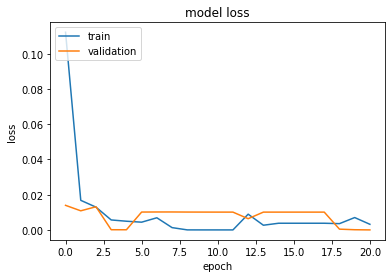

In [12]:
# Training history Statistics

print(history.history.keys())

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Save

In [13]:
# Save model
model.save('classifier2A.h5') 

import h5py
# save history
h = h5py.File('../history/c_his_2A.h5')
d = history.history
for k, v in d.items():
    h.create_dataset(k, data=np.array(v, dtype=np.float32))

# Analysis

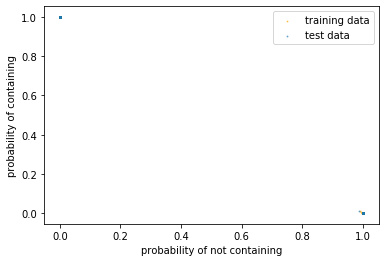

In [14]:
result_test = model.predict(X_test)
neg1 = result_test[0:,0] #first column
pos1 = result_test[0:,1] #second column

result_train = model.predict(X_train)
neg2 = result_train[0:,0] #first column
pos2 = result_train[0:,1] #second column

plt.scatter(neg2, pos2, s=1, color = 'orange',alpha=0.5, label = 'training data')
plt.scatter(neg1, pos1, s=1, alpha=0.5, label = 'test data')

plt.xlabel("probability of not containing")
plt.ylabel("probability of containing")
plt.legend(loc='upper right')
plt.show()